In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X=iris.data

In [3]:
y=iris.target

In [6]:
X.shape,y.shape

((150, 4), (150,))

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier()

In [9]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
knn.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(y,knn.predict(X))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

# representing text as numerical data

In [16]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [18]:
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [25]:
vect.vocabulary_

{'call': 1, 'you': 5, 'tonight': 4, 'me': 2, 'cab': 0, 'please': 3}

In [26]:
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [27]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [28]:
simple_train

['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [30]:

import pandas as pd
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())


,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [75]:
sms = pd.read_table('https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv', header=None, names=['label', 'message'])

C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [77]:
sms.message.head(10)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: message, dtype: object

In [78]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [79]:
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

In [80]:
X=sms.message

In [81]:
y=sms.label_num

In [82]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [83]:
vect = CountVectorizer()

In [167]:
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [168]:
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [157]:

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x3508 sparse matrix of type '<class 'numpy.int64'>'
	with 16824 stored elements in Compressed Sparse Row format>

In [158]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


In [159]:
nb.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [160]:
confusion_matrix(y_test,nb.predict(X_test_dtm))

array([[1202,    6],
       [  11,  174]], dtype=int64)

In [162]:
nb.score(X_test_dtm,y_test)

0.9877961234745154

In [163]:
from sklearn import metrics
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob


# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9900796491856095

In [164]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9900796491856095

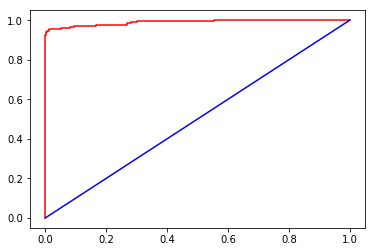

In [165]:
from matplotlib import pyplot as plt
fpr,tpr,threshold=metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr,color="red")
plt.plot([0,1],[0,1],color="BLUE")

In [129]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


# train the model using X_train_dtm
logreg.fit(X_train_dtm, y_train)


# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)


# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob


# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)



C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9798994974874372

In [130]:
# rows represent classes, columns represent tokens
nb.feature_count_

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 5., 23.,  2., ...,  0.,  0.,  0.]])

In [131]:

# number of times each token appears across all HAM messages
ham_token_count = nb.feature_count_[0, :]
ham_token_count

array([0., 0., 0., ..., 1., 1., 1.])

In [132]:
# number of times each token appears across all SPAM messages
spam_token_count = nb.feature_count_[1, :]
spam_token_count

array([ 5., 23.,  2., ...,  0.,  0.,  0.])

In [133]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

7204

In [134]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

['00', '000', '008704050406', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07008009200', '07090201529', '07090298926', '07123456789', '07732584351', '07734396839', '07742676969', '0776xxxxxxx', '07781482378', '07786200117', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '07880867867', '0789xxxxxxx', '07946746291', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705']


In [135]:
# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame({'token':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')
tokens.tail()

,ham,spam
token,,
zoom,1.0,0.0
zouk,0.0,1.0
zyada,1.0,0.0
èn,1.0,0.0
〨ud,1.0,0.0


In [136]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

,ham,spam
token,,
iphone,1.0,0.0
450ppw,0.0,2.0
join,9.0,13.0
dontcha,0.0,1.0
brings,4.0,1.0


In [137]:

# Naive Bayes counts the number of observations in each class
print(nb.class_count_) ## are th classes present in original daata set
print(confusion_matrix(y_train,nb.predict(X_train_dtm)))
print(3603+14)

[3617.  562.]
[[3602   15]
 [  12  550]]
3617


In [138]:
y_train.value_counts(normalize=True)

0    0.865518
1    0.134482
Name: label_num, dtype: float64

In [139]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1
tokens.sample(5, random_state=6)

,ham,spam
token,,
iphone,2.0,1.0
450ppw,1.0,3.0
join,10.0,14.0
dontcha,1.0,2.0
brings,5.0,2.0


In [140]:
# convert the ham and spam counts into frequencies
tokens['ham'] = tokens.ham / nb.class_count_[0]
tokens['spam'] = tokens.spam / nb.class_count_[1]
tokens.sample(5, random_state=6)

,ham,spam
token,,
iphone,0.000553,0.001779
450ppw,0.000276,0.005338
join,0.002765,0.024911
dontcha,0.000276,0.003559
brings,0.001382,0.003559


In [141]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=6)

,ham,spam,spam_ratio
token,,,
iphone,0.000553,0.001779,3.217972
450ppw,0.000276,0.005338,19.307829
join,0.002765,0.024911,9.010320
dontcha,0.000276,0.003559,12.871886
brings,0.001382,0.003559,2.574377


In [142]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('spam_ratio', ascending=False)

,ham,spam,spam_ratio
token,,,
claim,0.000276,0.158363,572.798932
prize,0.000276,0.135231,489.131673
150p,0.000276,0.087189,315.361210
tone,0.000276,0.085409,308.925267
guaranteed,0.000276,0.076512,276.745552
18,0.000276,0.069395,251.001779
cs,0.000276,0.065836,238.129893
www,0.000553,0.129893,234.911922
1000,0.000276,0.056940,205.950178


In [144]:
# remove English stop words
vect = CountVectorizer(stop_words='english')        ########## run all the codes again

In [166]:
#ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5                                      #by running this shape is still 7456 hence no trmrs appears
                                                                 #in more than 50% documnet

In [154]:
#only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

In [172]:
data=pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/yelp.csv')


In [176]:
data.text[0:2]

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
Name: text, dtype: object

In [178]:
yelp=data

In [179]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [180]:
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [181]:
# examine the class distribution
yelp.stars.value_counts().sort_index()

1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

In [182]:
yelp_best_wrost=yelp.loc[((yelp.stars==5)|(yelp.stars==1)),:]

In [215]:
yelp_best_wrost.shape
X=yelp_best_wrost.text
y=yelp_best_wrost.stars

In [216]:
from sklearn.model_selection import train_test_split 

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [218]:

# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3064,)
(1022,)
(3064,)
(1022,)


In [219]:
# import and instantiate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [220]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [221]:
X_train_dtm=vect.transform(X_train)
X_train_dtm.shape

(3064, 16825)

In [222]:
X_test_dtm=vect.transform(X_test)
X_test_dtm.shape

(1022, 16825)

In [223]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()


from sklearn.linear_model import LogisticRegression
log=LogisticRegression()


from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


from sklearn.svm import SVC
svc=SVC()

In [224]:

for i in [nb,log,rf,svc]:
    i.fit(X_train_dtm,y_train)
    print("score of {}".format(i), i.score(X_test_dtm,y_test) )

score of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 0.9187866927592955


C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 0.9256360078277887


C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


score of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.8816046966731899


C:\Users\sandY\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 0.8199608610567515


In [213]:
y_test.value_counts()

4    884
5    832
3    365
2    234
1    185
Name: stars, dtype: int64

In [225]:
nb.feature_count_

array([[26.,  4.,  1., ...,  0.,  0.,  0.],
       [39.,  5.,  0., ...,  1.,  1.,  1.]])

In [232]:
y_test.value_counts(normalize=True)

5    0.819961
1    0.180039
Name: stars, dtype: float64

In [230]:
838 / float(838 + 184)

0.8199608610567515

In [235]:

# first 10 false positives (1-star reviews incorrectly classified as 5-star reviews)
X_test[y_test < nb.predict(X_test_dtm)].head(10)



2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\nI brought my Mountain Bike in (w...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
Name: text, dtype: object

In [236]:
X_test[1781] # model is searching for word nice good impresive thts y rated high 

"If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating."

In [237]:
X_test[1919] ## model has no data to work with

'D-scust-ing.'

In [241]:
# first 10 false negatives (5-star reviews incorrectly classified as 1-star reviews)
X_test[y_test > nb.predict(X_test_dtm)].head(10)

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
Name: text, dtype: object

In [242]:
X_test[4963] 
# false negative: model is reacting to the words "complain", "crowds", "rushing", "pricey", "scum"

'This is by far my favourite department store, hands down. I have had nothing but perfect experiences in this store, without exception, no matter what department I\'m in. The shoe SA\'s will bend over backwards to help you find a specific shoe, and the staff will even go so far as to send out hand-written thank you cards to your home address after you make a purchase - big or small. Tim & Anthony in the shoe salon are fabulous beyond words! \n\nI am not completely sure that I understand why people complain about the amount of merchandise on the floor or the lack of crowds in this store. Frankly, I would rather not be bombarded with merchandise and other people. One of the things I love the most about Barney\'s is not only the prompt attention of SA\'s, but the fact that they aren\'t rushing around trying to help 35 people at once. The SA\'s at Barney\'s are incredibly friendly and will stop to have an actual conversation, regardless or whether you are purchasing something or not. I hav

In [243]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

16825

In [244]:
# store the number of times each token appears across each class
one_star_token_count = nb.feature_count_[0, :]
five_star_token_count = nb.feature_count_[1, :]

In [245]:
X_train_tokens

['00',
 '000',
 '00a',
 '00am',
 '00pm',
 '01',
 '02',
 '03',
 '03342',
 '04',
 '05',
 '06',
 '07',
 '09',
 '0buxoc0crqjpvkezo3bqog',
 '0l',
 '10',
 '100',
 '1000',
 '1000x',
 '1001',
 '100th',
 '101',
 '102',
 '105',
 '1070',
 '108',
 '10am',
 '10ish',
 '10min',
 '10mins',
 '10minutes',
 '10pm',
 '10th',
 '10x',
 '11',
 '110',
 '1100',
 '111',
 '111th',
 '112',
 '115th',
 '118',
 '11a',
 '11am',
 '11p',
 '11pm',
 '12',
 '120',
 '128i',
 '129',
 '12am',
 '12oz',
 '12pm',
 '12th',
 '13',
 '14',
 '140',
 '147',
 '14lbs',
 '15',
 '150',
 '1500',
 '150mm',
 '15am',
 '15mins',
 '15pm',
 '15th',
 '16',
 '160',
 '165',
 '169',
 '16th',
 '17',
 '17p',
 '18',
 '180',
 '18th',
 '19',
 '1900',
 '1913',
 '1928',
 '1929',
 '1930s',
 '1940',
 '1952',
 '1955',
 '1956',
 '1960',
 '1961',
 '1969',
 '1970',
 '1980',
 '1980s',
 '1987',
 '1990s',
 '1992',
 '1995',
 '1996',
 '1998',
 '1999',
 '19th',
 '1cent',
 '1k',
 '1p',
 '1pm',
 '1st',
 '20',
 '200',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007'

In [246]:
# create a DataFrame of tokens with their separate one-star and five-star counts
tokens = pd.DataFrame({'token':X_train_tokens, 'one_star':one_star_token_count, 'five_star':five_star_token_count}).set_index('token')
# add 1 to one-star and five-star counts to avoid dividing by 0
tokens['one_star'] = tokens.one_star + 1
tokens['five_star'] = tokens.five_star + 1

In [248]:
nb.class_count_

array([ 565., 2499.])

In [249]:
# convert the one-star and five-star counts into frequencies
tokens['one_star'] = tokens.one_star / nb.class_count_[0]
tokens['five_star'] = tokens.five_star / nb.class_count_[1]

In [251]:
tokens["five_star_ratio"]=tokens.five_star/tokens.one_star

In [256]:
tokens.sort_values("five_star_ratio",ascending=False).head(10)

,one_star,five_star,five_star_ratio
token,,,
fantastic,0.003540,0.077231,21.817727
perfect,0.005310,0.098039,18.464052
yum,0.001770,0.024810,14.017607
favorite,0.012389,0.138055,11.143029
outstanding,0.001770,0.019608,11.078431
brunch,0.001770,0.016807,9.495798
gem,0.001770,0.016006,9.043617
mozzarella,0.001770,0.015606,8.817527
pasty,0.001770,0.015606,8.817527


In [257]:
##########################


In [258]:
# define X and y using the original DataFrame
X = yelp.text
y = yelp.stars

In [261]:
y.value_counts().sort_index()

1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

In [262]:

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [263]:
# create document-term matrices using CountVectorizer
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [264]:
# fit a Multinomial Naive Bayes model
nb.fit(X_train_dtm, y_train)


# make class predictions
y_pred_class = nb.predict(X_test_dtm)


In [265]:
# calculate the accuary
metrics.accuracy_score(y_test, y_pred_class)

0.4712

In [266]:
# calculate the null accuracy
y_test.value_counts().head(1) / y_test.shape

4    0.3536
Name: stars, dtype: float64

In [267]:
y_test.value_counts()

4    884
5    832
3    365
2    234
1    185
Name: stars, dtype: int64

In [269]:
y_test.shape

(2500,)

In [270]:
884/2500

0.3536

In [271]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 55,  14,  24,  65,  27],
       [ 28,  16,  41, 122,  27],
       [  5,   7,  35, 281,  37],
       [  7,   0,  16, 629, 232],
       [  6,   4,   6, 373, 443]], dtype=int64)

In [272]:
# print the classification report
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       0.54      0.30      0.38       185
           2       0.39      0.07      0.12       234
           3       0.29      0.10      0.14       365
           4       0.43      0.71      0.53       884
           5       0.58      0.53      0.55       832

   micro avg       0.47      0.47      0.47      2500
   macro avg       0.45      0.34      0.35      2500
weighted avg       0.46      0.47      0.43      2500



In [273]:
#**Precision** answers the question: "When a given class is predicted, how often 
    #are those predictions correct?" To calculate the precision for class 1, for example, you divide 55 by the sum of the first column of the confusion matrix.

  #  precision for class 1
55/(28+5+7+6+55)

0.5445544554455446

In [275]:
# **Recall** answers the question: "When a given class is the true class, how often is that class predicted?" 
55/(55+14+24+65+27)

0.2972972972972973

In [276]:
#SUPPORT "How many observations exist for which a given class is the true class?"
55+14+24+65+27

185